## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""


'\nYour code here (optional)\n確認硬體資源\n'

In [2]:
import os
import keras
import numpy as np

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten = True):
    min_x = np.min(x)
    max_x = np.max(x)
    x  = (2*((x-min_x)/(max_x-min_x)))-1
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# validate process result
print(" x_train min : ", np.min(x_train))
print(" x_train max : ", np.max(x_train))
# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

 x_train min :  -1.0
 x_train max :  1.0


In [6]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model



### 多加入網路層, 共7層

In [7]:
model = build_mlp(input_shape=x_train.shape[1:], num_neurons=[1024,512,265,128,64,32,16])
model.summary()

W0713 20:28:22.849819 140129656223552 deprecation.py:237] From /home/simon/tf_workspace/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4139: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 1024)              3146752   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 512)               524800    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 265)               135945    
_________________________________________________________________
hidden_layer4 (Dense)        (None, 128)               34048     
_________________________________________________________________
hidden_layer5 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer6 (Dense)        (None, 32)                2080      
__________

In [8]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [9]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

W0713 20:28:23.064910 140129656223552 deprecation.py:237] From /home/simon/tf_workspace/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [10]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 3s 51us/step - loss: 1.8393 - acc: 0.3316 - val_loss: 1.6377 - val_acc: 0.4226
Epoch 2/100
50000/50000 [==============================] - 1s 27us/step - loss: 1.5868 - acc: 0.4431 - val_loss: 1.5496 - val_acc: 0.4477
Epoch 3/100
50000/50000 [==============================] - 1s 27us/step - loss: 1.4543 - acc: 0.4880 - val_loss: 1.4568 - val_acc: 0.4903
Epoch 4/100
50000/50000 [==============================] - 1s 26us/step - loss: 1.3470 - acc: 0.5269 - val_loss: 1.4361 - val_acc: 0.5013
Epoch 5/100
50000/50000 [==============================] - 1s 26us/step - loss: 1.2580 - acc: 0.5598 - val_loss: 1.3752 - val_acc: 0.5294
Epoch 6/100
50000/50000 [==============================] - 1s 26us/step - loss: 1.1664 - acc: 0.5890 - val_loss: 1.3915 - val_acc: 0.5234
Epoch 7/100
50000/50000 [==============================] - 1s 27us/step - loss: 1.0901 - acc: 0.6168 - val_loss: 1.4206 - 

50000/50000 [==============================] - 1s 26us/step - loss: 0.0651 - acc: 0.9786 - val_loss: 3.3708 - val_acc: 0.5444
Epoch 60/100
50000/50000 [==============================] - 1s 27us/step - loss: 0.0857 - acc: 0.9733 - val_loss: 3.2182 - val_acc: 0.5453
Epoch 61/100
50000/50000 [==============================] - 1s 27us/step - loss: 0.0896 - acc: 0.9723 - val_loss: 3.4366 - val_acc: 0.5378
Epoch 62/100
50000/50000 [==============================] - 1s 26us/step - loss: 0.0796 - acc: 0.9762 - val_loss: 3.3414 - val_acc: 0.5344
Epoch 63/100
50000/50000 [==============================] - 1s 26us/step - loss: 0.0773 - acc: 0.9752 - val_loss: 3.4381 - val_acc: 0.5444
Epoch 64/100
50000/50000 [==============================] - 1s 27us/step - loss: 0.0700 - acc: 0.9780 - val_loss: 3.4050 - val_acc: 0.5390
Epoch 65/100
50000/50000 [==============================] - 1s 27us/step - loss: 0.0715 - acc: 0.9776 - val_loss: 3.3722 - val_acc: 0.5367
Epoch 66/100
50000/50000 [==============

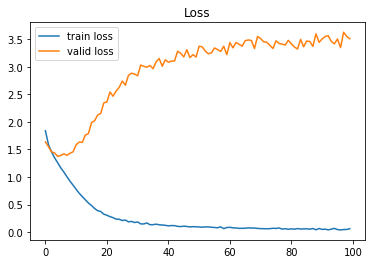

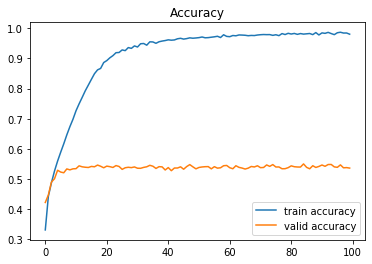

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

### 改用CPU來訓練的log

In [12]:
'''
os.environ["CUDA_VISIBLE_DEVICES"] = ""
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)
'''

'\nos.environ["CUDA_VISIBLE_DEVICES"] = ""\nmodel.fit(x_train, y_train, \n          epochs=EPOCHS, \n          batch_size=BATCH_SIZE, \n          validation_data=(x_test, y_test), \n          shuffle=True)\n'

Train on 50000 samples, validate on 10000 samples

Epoch 1/100

50000/50000 [==============================] - 8s 160us/step - loss: 1.7721 - acc: 0.3685 - val_loss: 1.6023 - val_acc: 0.4282

Epoch 2/100

50000/50000 [==============================] - 7s 145us/step - loss: 1.5176 - acc: 0.4634 - val_loss: 1.4586 - val_acc: 0.4872

Epoch 3/100

50000/50000 [==============================] - 7s 145us/step - loss: 1.3938 - acc: 0.5108 - val_loss: 1.4341 - val_acc: 0.4915

Epoch 4/100

50000/50000 [==============================] - 7s 145us/step - loss: 1.2955 - acc: 0.5432 - val_loss: 1.3732 - val_acc: 0.5131

Epoch 5/100

50000/50000 [==============================] - 7s 145us/step - loss: 1.2005 - acc: 0.5787 - val_loss: 1.3503 - val_acc: 0.5330

Epoch 6/100

50000/50000 [==============================] - 7s 145us/step - loss: 1.1120 - acc: 0.6079 - val_loss: 1.3725 - val_acc: 0.5321

Epoch 7/100

50000/50000 [==============================] - 7s 145us/step - loss: 1.0317 - acc: 0.6373 - val_loss: 1.3999 - val_acc: 0.5357

Epoch 8/100

50000/50000 [==============================] - 7s 144us/step - loss: 0.9558 - acc: 0.6609 - val_loss: 1.3790 - val_acc: 0.5392

Epoch 9/100

50000/50000 [==============================] - 7s 145us/step - loss: 0.8749 - acc: 0.6898 - val_loss: 1.4442 - val_acc: 0.5509

Epoch 10/100

50000/50000 [==============================] - 7s 145us/step - loss: 0.8019 - acc: 0.7161 - val_loss: 1.4340 - val_acc: 0.5462

Epoch 11/100

50000/50000 [==============================] - 7s 145us/step - loss: 0.7344 - acc: 0.7405 - val_loss: 1.5654 - val_acc: 0.5427

Epoch 12/100

50000/50000 [==============================] - 7s 145us/step - loss: 0.6543 - acc: 0.7661 - val_loss: 1.5900 - val_acc: 0.5462

Epoch 13/100

50000/50000 [==============================] - 7s 145us/step - loss: 0.5992 - acc: 0.7881 - val_loss: 1.6495 - val_acc: 0.5408

Epoch 14/100

50000/50000 [==============================] - 7s 145us/step - loss: 0.5501 - acc: 0.8057 - val_loss: 1.7240 - val_acc: 0.5418

Epoch 15/100